# Embedding
- 수많은 단어(또는 데이터)를 벡터 형태로 표현

## 토큰화 작업 수행하기
- 토큰 : 문법적으로 더 이상 나눌 수 없는 언어요소
- 1) 토큰화 : 토큰으로 변환하는 작업
    예) 'You are the Best' (텍스트 데이터) -> 'You', 'are', 'the', 'Best' (토큰화)
- 2) 이진 인코딩 : 'You', 'are',  'the',  'Best'
                  1      1      1     0
- 3) 워드 임베딩 : 'You',  'are',  'the',  'Best'
                 0.3     0     0.5    0.8
* 텍스트 데이터를 신경망에 입력하려면 1), 2), 3)을 통해 적절한 형태로 바꾸는 전처리 작업을 거쳐야 한다

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical # 원핫인코딩

texts = ['You are the Best', 
         'You are the Nice']

# num_words : 빈번하게 사용되는 단어의 개수
# oov_token : 주어진 문장에 포함되지 않은 단어가 존재할 경우 '<OOV>' 로 대체
tokenizer = Tokenizer(num_words = 10, oov_token =  '<OOV>')
tokenizer.fit_on_texts(texts)

# 텍스트 데이터를 정수 인덱스 형태로 변환합니다.
sequences = tokenizer.texts_to_sequences(texts)

# 이진 형태로 인코딩합니다.
binary_results = tokenizer.sequences_to_matrix(sequences, mode = 'binary')

print(tokenizer.word_index) # 토큰화
print('--------------------')

print(f'sequences: {sequences}\n')
print(f'binary_vectors:\n {binary_results}\n')
# 원-핫 형태로 인코딩합니다.
# print(to_categorical(sequences))

test_text = ['You are the One']
test_seq = tokenizer.texts_to_sequences(test_text)

print(f'test sequences: {test_seq}')


{'<OOV>': 1, 'you': 2, 'are': 3, 'the': 4, 'best': 5, 'nice': 6}
--------------------
sequences: [[2, 3, 4, 5], [2, 3, 4, 6]]

binary_vectors:
 [[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 0.]]

test sequences: [[2, 3, 4, 1]]


## 데이터셋 다운받기

In [2]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

C:\Users\028\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\028\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


## 데이터 형태 확인하기

In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


## 첫 번째 데이터 확인하기

In [4]:
print(X_train[0])
print('-------')
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
-------
1


## IMDB 데이터셋에서 가장 빈번하게 사용되는 3개의 단어

In [5]:
imdb_get_word_index = {}

for key, value in imdb.get_word_index().items():
    imdb_get_word_index[value] = key
    #print(imdb_get_word_index[value])
    
for i in range(1, 4):
    print('{} 번째로 가장 많이 쓰인 단어 = {}'.format(i, imdb_get_word_index[i]))

1 번째로 가장 많이 쓰인 단어 = the
2 번째로 가장 많이 쓰인 단어 = and
3 번째로 가장 많이 쓰인 단어 = a


## 데이터를 동일한 길이로 맞추기
- Embedding 층을 사용하기 위해서는 시퀀스 데이터(문장)의 길이가 전부 동일해야 한다. 이를위해 pad_sequences()함수를 사용한다
- 이 함수는 해당 데이터가 지정해준 길이 보다 짧은 경우 0으로 채워넣고, 긴 경우는 잘라낸다

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

print('Before pad_sequences: ', len(X_train[0]))

pad_X_train = pad_sequences(X_train, maxlen=max_len, padding = 'pre')
pad_X_test = pad_sequences(X_test, maxlen=max_len, padding = 'pre')

print('After pad_sequences: ', len(pad_X_train[0]))

Before pad_sequences:  218
After pad_sequences:  500


## Embedding 층을 사용하여 모델 구성하기
- 모델의 첫 번째 층으로만 사용할 수 있다
- 입력 : (batch_size, sequence_length) 형태로 입력
- 출력 : (batch_size, sequence_length, output_dim)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()

# 이 층은 모델의 제일 첫 번째 층으로만 사용할 수 있습니다.
# Flatten 층을 사용하기 위해 input_length를 전달합니다.
# input_length 인자는 Embedding층과 연결된 층이 순환신경망일 경우엔 사용하지 않는다
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 16001     
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________


## 모델 학습시키기

In [9]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, 
                    epochs = 30, 
                    validation_split = 0.2)

Epoch 1/30
625/625 [==============================] - 4s 6ms/step - loss: 0.4784 - acc: 0.7577 - val_loss: 0.3096 - val_acc: 0.8662
Epoch 2/30
625/625 [==============================] - 4s 6ms/step - loss: 0.2009 - acc: 0.9258 - val_loss: 0.2755 - val_acc: 0.8854
Epoch 3/30
625/625 [==============================] - 4s 6ms/step - loss: 0.1070 - acc: 0.9711 - val_loss: 0.2933 - val_acc: 0.8812
Epoch 4/30
625/625 [==============================] - 4s 6ms/step - loss: 0.0521 - acc: 0.9905 - val_loss: 0.3092 - val_acc: 0.8826
Epoch 5/30
625/625 [==============================] - 4s 6ms/step - loss: 0.0241 - acc: 0.9974 - val_loss: 0.3342 - val_acc: 0.8824
Epoch 6/30
625/625 [==============================] - 4s 6ms/step - loss: 0.0120 - acc: 0.9995 - val_loss: 0.3579 - val_acc: 0.8812
Epoch 7/30
625/625 [==============================] - 4s 6ms/step - loss: 0.0064 - acc: 0.9998 - val_loss: 0.3791 - val_acc: 0.8790
Epoch 8/30
625/625 [==============================] - 4s 6ms/step - loss: 0.

## 모델 평가하기

In [10]:
model.evaluate(pad_X_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.7897 - acc: 0.8699


[0.7896711230278015, 0.8698800206184387]

## 학습과정 확인하기

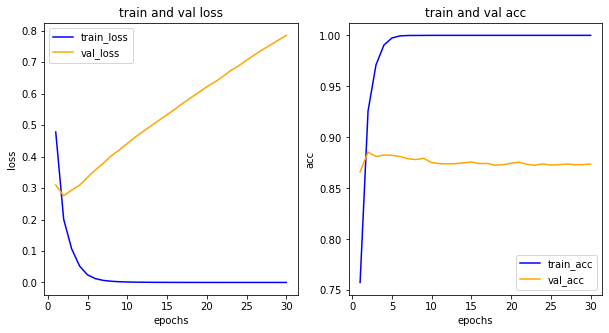

In [11]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()